In [60]:
import pandas as pd
import numpy as np 
import  matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [61]:
df3=pd.read_csv("diabetes.csv")
df3.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,1
1,1,85,66.0,29,0,26.6,0.351,31,0
2,8,183,NaN,0,0,23.3,0.672,32,1
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,2.288,33,1


In [62]:
df3.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76.0,48,180,32.9,0.171,63,0
764,2,122,70.0,27,0,36.8,0.340,27,0
765,5,121,72.0,23,112,26.2,0.245,30,0
766,1,126,60.0,0,0,30.1,0.349,47,1
767,1,93,70.0,31,0,30.4,0.315,23,0


In [63]:
df3.dropna(inplace =True)

In [64]:
df3.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

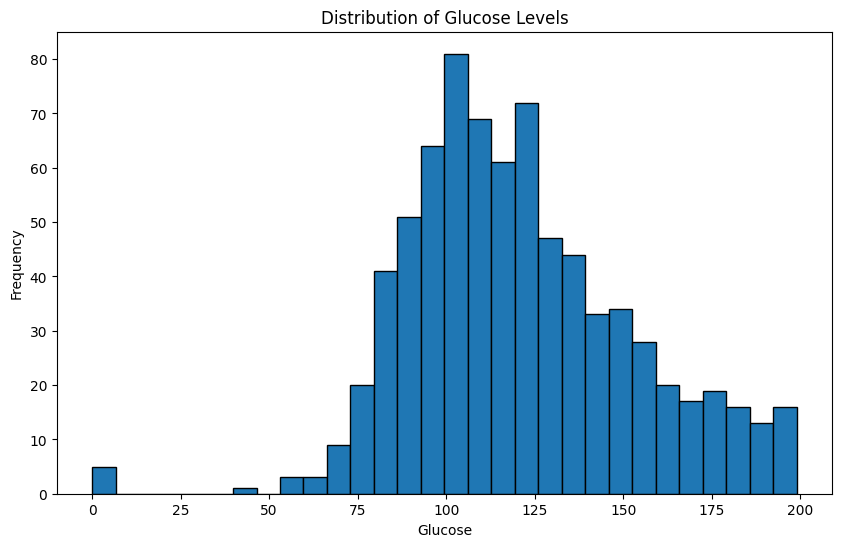

In [65]:
plt.figure(figsize=(10, 6))
plt.hist(df3['Glucose'], bins=30, edgecolor='black')
plt.title('Distribution of Glucose Levels')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.show()

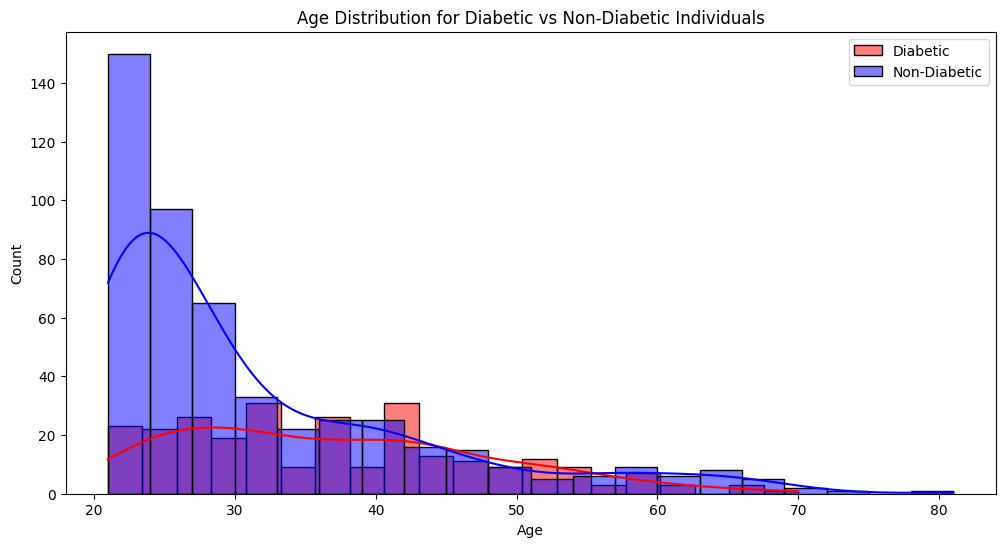

In [66]:
plt.figure(figsize=(12, 6))
sns.histplot(df3[df3['Outcome'] == 1]['Age'], kde=True, color='red', label='Diabetic', bins=20)
sns.histplot(df3[df3['Outcome'] == 0]['Age'], kde=True, color='blue', label='Non-Diabetic', bins=20)
plt.title('Age Distribution for Diabetic vs Non-Diabetic Individuals')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()

plt.show()

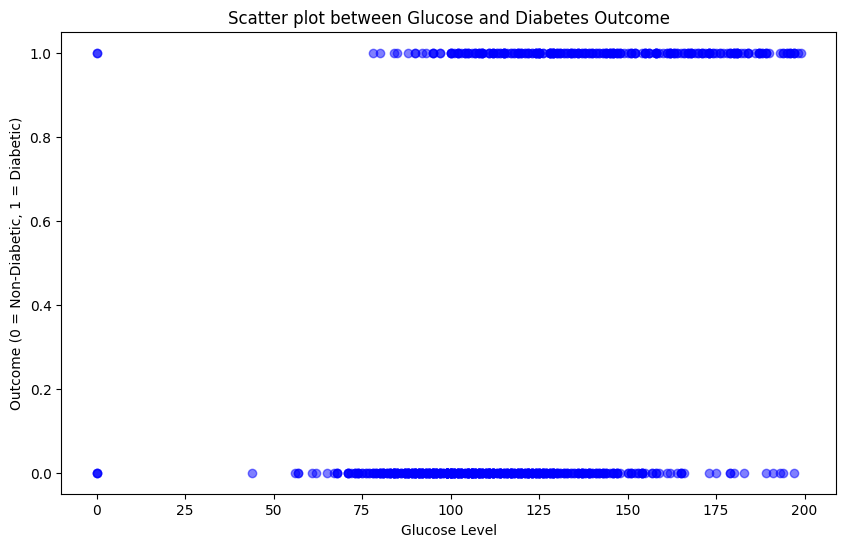

In [67]:
plt.figure(figsize=(10,6))
plt.scatter(x=df3['Glucose'], y=df3['Outcome'], color='blue', alpha=0.5)
plt.title('Scatter plot between Glucose and Diabetes Outcome')
plt.xlabel('Glucose Level')
plt.ylabel('Outcome (0 = Non-Diabetic, 1 = Diabetic)')
plt.show()

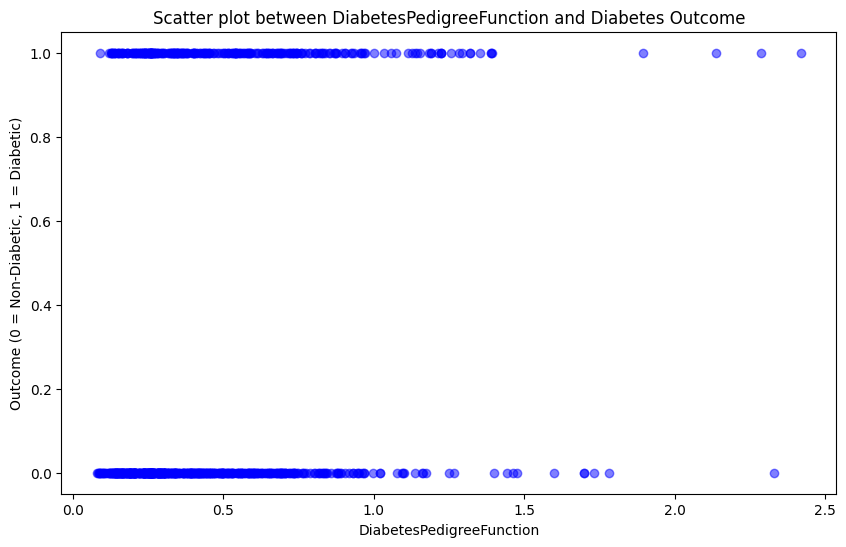

In [68]:
plt.figure(figsize=(10,6))
plt.scatter(x=df3['DiabetesPedigreeFunction'], y=df3['Outcome'], color='blue', alpha=0.5)
plt.title('Scatter plot between DiabetesPedigreeFunction and Diabetes Outcome')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Outcome (0 = Non-Diabetic, 1 = Diabetic)')
plt.show()

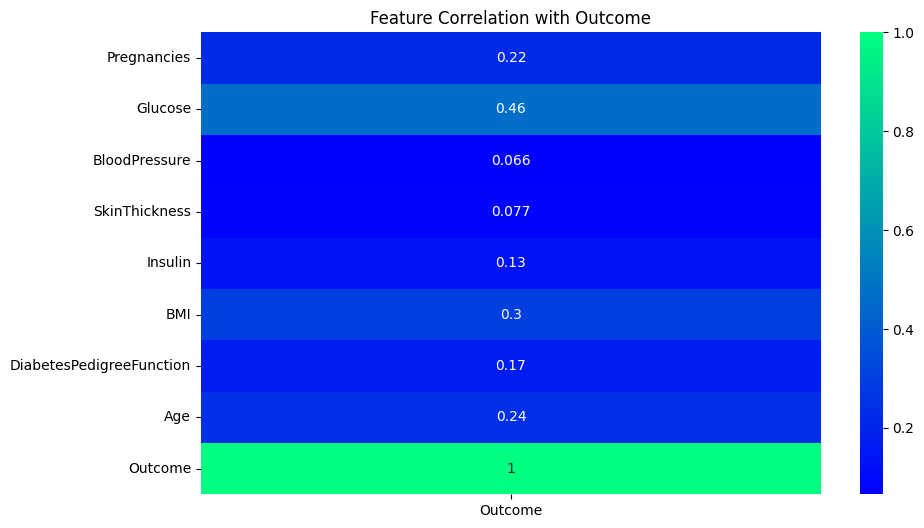

In [69]:
corr_matrix = df3.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix[['Outcome']], annot=True, cmap='winter')
plt.title("Feature Correlation with Outcome")
plt.show()

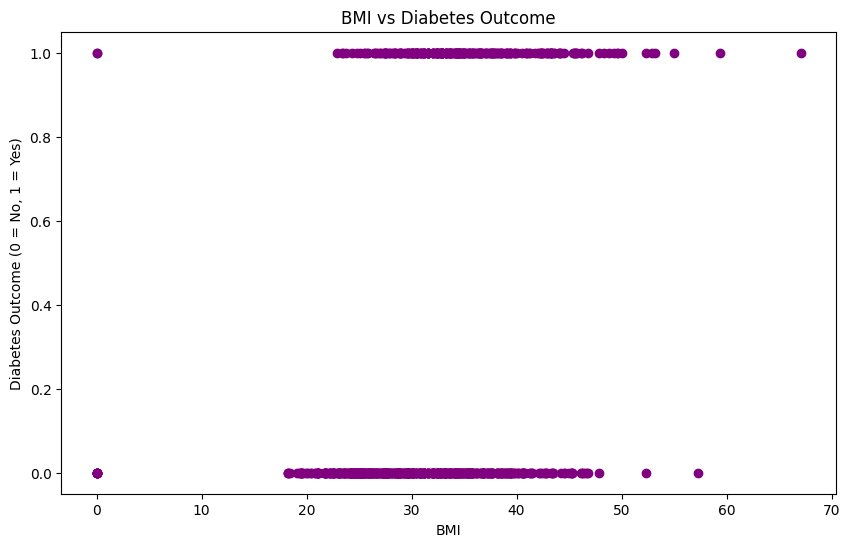

In [70]:
plt.figure(figsize=(10,6))
plt.scatter(df3['BMI'], df3['Outcome'], color='purple')
plt.title('BMI vs Diabetes Outcome')
plt.xlabel('BMI')
plt.ylabel('Diabetes Outcome (0 = No, 1 = Yes)')
plt.show()

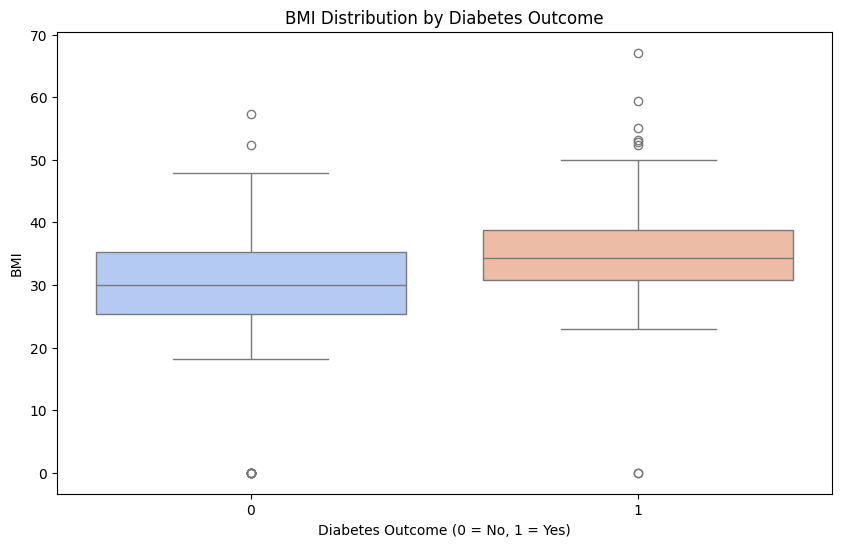

In [71]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Outcome', y='BMI', data=df3, hue='Outcome', palette='coolwarm', legend=False)
plt.title('BMI Distribution by Diabetes Outcome')
plt.xlabel('Diabetes Outcome (0 = No, 1 = Yes)')
plt.ylabel('BMI')
plt.show()

In [72]:
X3=df3.drop("Outcome",axis=1)
y3=df3['Outcome']
X_train3,X_test3,y_train3,y_test3=train_test_split(X3,y3,test_size=0.2,random_state=42)
# print shape of traning and testing
print(X_train3.shape,X_test3.shape,y_train3.shape,y_test3.shape)

(613, 8) (154, 8) (613,) (154,)


In [73]:
model3=LogisticRegression(max_iter=500)
model3.fit(X_train3,y_train3)

LogisticRegression(max_iter=500)

In [74]:
# Evaluate model
y_pred3 = model3.predict(X_test3)
print("Accuracy : ", accuracy_score(y_test3, y_pred3))

Accuracy :  0.8116883116883117


In [75]:
# Confusion matrix
cm = confusion_matrix(y_test3, y_pred3)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[87 10]
 [19 38]]


In [76]:
#report
report=classification_report(y_test3, y_pred3)
print("classification_report :")
print(report)

classification_report :
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        97
           1       0.79      0.67      0.72        57

    accuracy                           0.81       154
   macro avg       0.81      0.78      0.79       154
weighted avg       0.81      0.81      0.81       154

